In [1]:
from qiskit import *
import numpy as np
from qiskit.quantum_info import DensityMatrix
from qiskit.aqua.algorithms import NumPyEigensolver
from qiskit.quantum_info import Statevector
from sympy import Matrix
from qiskit.aqua.utils import get_subsystem_density_matrix

#### Density matrix of an IBM quantum computer generated GHZ state:  
we will use the distribution of states given by running the 4-qubit GHZ circuit to create a statevector which we use to create density matrices and run partial traces to describe subsystem reduced density matrices.

In [2]:
My_GHZ_statevector_array = np.array(np.sqrt([0.45288,0.02063,0.00806,0.01221,0.00537,0.00342,0.00391,0.02808,0.00928,0.00391,0.00183,0.01929,0.01563,0.03699,0.03784,0.34070])) 

In [3]:
## now we form the density matrix for our resulting state using the same methods we above.
My_GHZ_statevector = Statevector(My_GHZ_statevector_array)
My_GHZ_density_matrix = DensityMatrix(My_GHZ_statevector)

My_GHZ_density_matrix
Matrix(My_GHZ_density_matrix.data);

We will divide the 4 qubit system into a bipartition of sybsystems, System A being the first qubit and system B being the second + third + fourth.

In [4]:
My_first_qubit_subsyetem_array = get_subsystem_density_matrix(My_GHZ_statevector_array,[1,2,3])
## the 1,2,3 here in the argument indicated that we were tracing out the 2nd 3rd and 4th qubits
Matrix(My_first_qubit_subsyetem_array)

Matrix([
[           0.5348, 0.270896041525614],
[0.270896041525614,           0.46523]])

We expected an 2x2 matrix since we have 1 qubits left after tracing out the last 3.

In [5]:
My_second_third_fourth_qubit_subsyetem_array = get_subsystem_density_matrix(My_GHZ_statevector_array,[0])
Matrix(My_second_third_fourth_qubit_subsyetem_array)

Matrix([
[           0.47351, 0.0762881062603563, 0.0577146418117416,   0.06614886112392, 0.0738097131694032, 0.0487371244935152,  0.111758239218311,  0.214745276094623],
[0.0762881062603563,            0.02027, 0.0130409793797142, 0.0241301793381081, 0.0155580077924148, 0.0191875628326672, 0.0324759925669338, 0.0819616254672312],
[0.0577146418117416, 0.0130409793797142,            0.00879, 0.0143818890852383,  0.010716093630603, 0.0112571231982088, 0.0204089806864245, 0.0483897899189307],
[  0.06614886112392, 0.0241301793381081, 0.0143818890852383,            0.03199, 0.0165018925321428, 0.0259485981818622, 0.0400460459528297,  0.109973956973189],
[0.0738097131694032, 0.0155580077924148,  0.010716093630603, 0.0165018925321428,            0.01319, 0.0128056641909702, 0.0240697798496923, 0.0552375875409841],
[0.0487371244935152, 0.0191875628326672, 0.0112571231982088, 0.0259485981818622, 0.0128056641909702,            0.02112, 0.0320602831394646, 0.0893899983168604],
[ 0.111758239218311

We expected an 8x8 matrix since we have 3 qubits left after tracing out the last first.

In [6]:
Density_matrix_Subsystem_A = DensityMatrix(My_second_third_fourth_qubit_subsyetem_array)
Density_matrix_Subsystem_A
Density_matrix_Subsystem_A.purity()

(0.6492193235284944+0j)

In [7]:
Density_matrix_Subsystem_B = DensityMatrix(My_first_qubit_subsyetem_array)
Density_matrix_Subsystem_B
Density_matrix_Subsystem_B.purity()

(0.6492193235284947+0j)

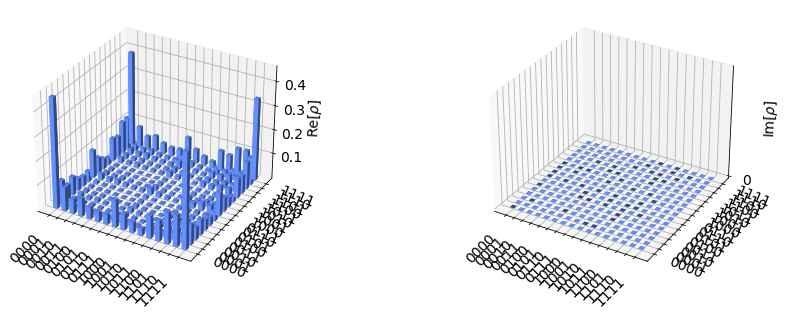

In [8]:
from qiskit.visualization import plot_state_city
plot_state_city(My_GHZ_statevector)

They have the same Purity !!!!  
Also :  
Eigenvalues of reduced density matrix of B: (0.773135 ,0.226895 ,0 ,0 ,0 ,0,0 ,0)  
Eigenvalues of reduced density matrix of A: (0.773135 ,0.226895)  
SO they have the same number AND VALUE of non-zero eigenvalues, although they have different sized  
SO THEY CARRY THE SAME INFO ON ENTANGLMENT. WE CAN OBTAIN ENTANGLMENT INFO BETWEEN THE 2 SUBSYSTEMS USING ANY OF THE 2 REDUCED DENSITY MATRICES